The following cell performs the initialisation of modules and data read-in,
unless this is changed, or the read-in data modified, it only needs to be run once each time the notebook is opened

In [1]:
#numpy and datetime
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

#function for converting the byte object version of the date and time into a
#datetime object
def bytetodatetime(x):
    return dt.datetime.strptime(x.decode(), '%Y-%m-%d %H:%M:%S')

datapath = 'C:/Users/tmk5/Downloads/' #this should be your own path
#containing the data file
datafile = 'Weather_all.csv' #name of the data file itself

#load the first two columns - date/time and the OAT sensor
#delimiter=',' specifies that the data are separated (delimited) by commas
#usecols=[0,1] indicates which columns to attempt to read
#converters={0:bytetodatetime} defines whether column data should be passed
#via any functions first...
#...in this case, column 0 is sent to bytetodatetime to do the data type
#conversion correctly
#skip_header=1 indicates how many rows to skip past at the top of the data file
#unpack=True indicates to store the columns as separate, 1D arrays,
#rather than the entire dataset as a single 2D array
#dDT, dTE = np.genfromtxt(datapath+datafile, delimiter=',', usecols=[0,1], converters={0:bytetodatetime}, skip_header=1, unpack=True)

#the following alternative version of the line reads in *all* columns from the file
dDT, dTE, dWU, dRT, dWK, dWR, dWT, dWG, dWS, dWD, dWV, dTI, dFI, dTX, dFX = np.genfromtxt(datapath+datafile, delimiter=',', converters={0:bytetodatetime}, skip_header=1, unpack=True)

The following cell shows a quick check of the data read in above

In [7]:
print(f'Read in {len(dDT)} dates and times, earliest is {np.min(dDT)} and latest is {np.max(dDT)}, duration is {np.max(dDT) - np.min(dDT)}')
print(f'Read in {len(dTE)} OATs, lowest is {np.min(dTE):0.2f}°C, highest is {np.max(dTE):0.2f}°C, mean is {np.mean(dTE):0.2f}°C, median is {np.median(dTE):0.2f}°C')

Read in 684568 dates and times, earliest is 2015-06-22 10:05:00 and latest is 2022-02-21 10:55:00, duration is 2436 days, 0:50:00
Read in 684568 OATs, lowest is -9.28°C, highest is 56.82°C, mean is 10.81°C, median is 10.43°C


The following command is an example of replacing all of the placeholder numerical values (-99999.0) with np.nan to make the data easier to work with for matplotlib

In [8]:
dTX[dTX < -99998] = np.nan

The following cell produces a simple graph of all OAT readings over time, this uses only the default settings for a basic plot

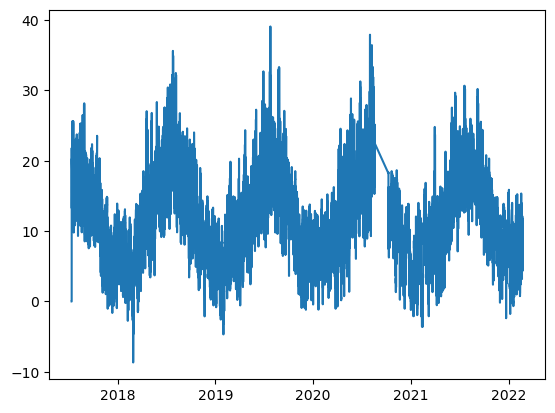

In [43]:
plt.plot(dDT,dTX)
plt.show()

The following example is a more elaborate version of the same data

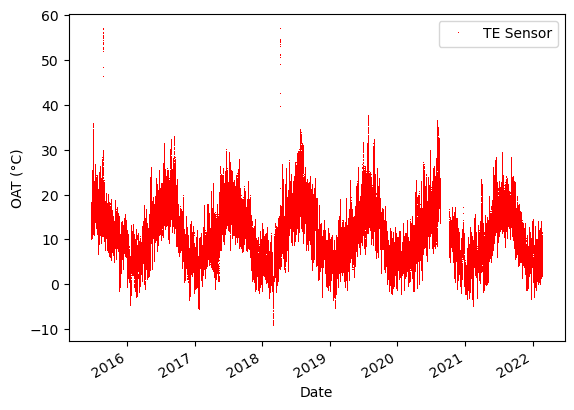

In [40]:
#plot the data series, arguments are x data, y data, the "fmt" sequence
#(in this case red "r" pixels ",") and a label to notate the series for
#if a legend/etc. is used
plt.plot(dDT,dTE,'r,',label='TE Sensor')
#plt.plot(dDT,dTX,'r,',label='TX Sensor') #TX sensor, if read in,
#with anomalous data

plt.legend() #adds a legend (superfluous here, with only one data series)
#simple axis labels
plt.xlabel('Date')
plt.ylabel('OAT (°C)')
plt.gcf().autofmt_xdate() #attempts to automatically tidy up datetime axes
plt.show()

The following is one approach to selecting a particular range of dates to plot OAT. Note that the original data is not modified; we are just selecting a subset at the time of plotting and using that. Modifying source data is potentially fragile as sequential runs may then be working on different data

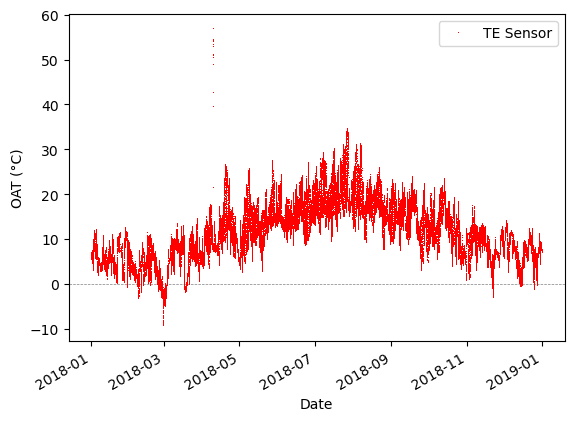

In [27]:
date_selection = np.logical_and(dDT >= dt.datetime(2018,1,1), dDT < dt.datetime(2019,1,1))

#add a thin (linewidth=0.5), grey (colour='grey') dashed (linestyle='dashed')
#line at 0°C
plt.axhline(0,color='grey',linestyle='dashed', linewidth=0.5)
#plot the data matching the selection only
plt.plot(dDT[date_selection],dTE[date_selection],'r,',label='TE Sensor')
#additional plotting commands as before for tidying up plot elements
plt.legend()
plt.xlabel('Date')
plt.ylabel('OAT (°C)')
plt.gcf().autofmt_xdate()
plt.show()

Of note in the previous plot are some outlier points approaching 60°C. These are likely anomalous. The following example trims the most egregious ones.

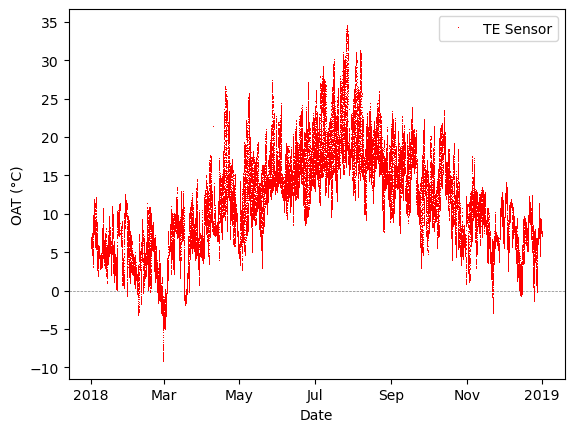

In [32]:
#for alternative date formatting
import matplotlib.dates as mdates

date_selection = np.logical_and(dDT >= dt.datetime(2018,1,1), dDT < dt.datetime(2019,1,1))
tem_selection = np.logical_and(dTE >= -20, dTE < 35)
all_selection = np.logical_and.reduce((date_selection,tem_selection))

#add a thin (linewidth=0.5), grey (colour='grey') dashed (linestyle='dashed')
#line at 0°C
plt.axhline(0,color='grey',linestyle='dashed', linewidth=0.5)
#plot the data matching the selection only
plt.plot(dDT[all_selection],dTE[all_selection],'r,',label='TE Sensor')
#additional plotting commands as before for tidying up plot elements
plt.legend()
plt.xlabel('Date')
plt.ylabel('OAT (°C)')
plt.yticks(np.arange(-10,36,5))

#An alternative formatting approach for the dates, see https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
plt.gca().xaxis.set_major_formatter(mdates.ConciseDateFormatter(plt.gca().xaxis.get_major_locator()))
plt.show()

The following is an example of a histogram of the wind speed data using bins running from 1 km hr^-1 to 40 km hr^-1 with 100 bins total; an alternative approach to the bins might be: np.arange(1,40,0.5) for example. np.linspace() takes start, stop and quantity, calculated step by itself; np.arange() takes start, stop and step, calculating quantity by itself.

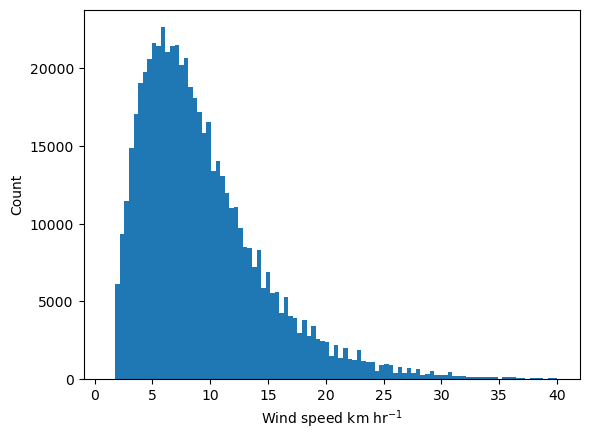

In [4]:
plt.hist(dWG,bins=np.linspace(1,40,100))
plt.xlabel('Wind speed km hr$^{-1}$')
plt.ylabel('Count')
plt.show()

There are many plot types available (search matplotlib online to access the documentation and lots of examples), below is an example of the .hist2d() plot type, giving a 2 dimensional histogram of the outside air temperature and inside air temperature. Some interesting patterns can be found in this plot, think about what it might show.

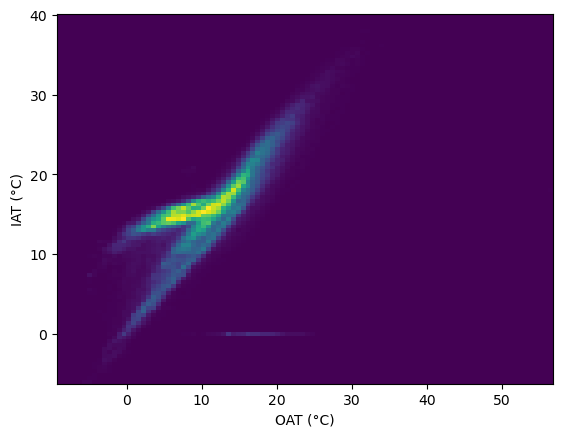

In [3]:
plt.hist2d(dTE,dTI,bins=[100,100])
plt.xlabel('OAT (°C)')
plt.ylabel('IAT (°C)')
plt.show()

The following example illustrates fitting data with a polynomial (although in this case order 1). The steps are elaborated in the comments within the code.

Fitted coefficients [1.00109333 1.1175704 ]


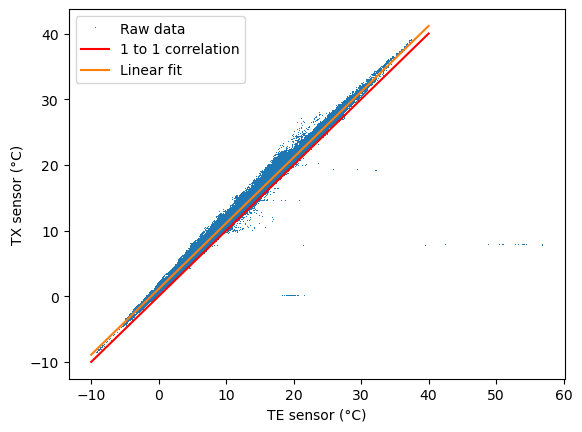

In [10]:
#this plots the two outside air temperature sensors against one another
#the "label" argument lets the legend know what to call the series
plt.plot(dTE,dTX,linestyle='none',marker=',',label='Raw data')

#this draws a red line with intercept=0 and gradient=1; corresponding to
#the two measurements perfectly agreeing
plt.plot([-10,40],[-10,40],'r-',label='1 to 1 correlation')

#polyfit does not work correctly with np.nan values, which result in a failure
#to converge; this selection masks those values
valid = dTX > -100

#this applies polyfit - it takes 3 arguments: xdata, ydata and polynomial order
#it returns a numpy array with as many items as there are orders of x
#in this case - the coefficients for the x^1 and x^0 terms, the gradient and
#intercept
popt = np.polyfit(dTE[valid],dTX[valid],1)

#presents the fitted coefficients
print('Fitted coefficients',popt)

#this sets up two data points as a numpy array to represent the range on
#the x-axis for which a plotted fit is desired
xs = np.linspace(-10,40,2)

#polyval takes two arguements: the coefficients (it determines order from the
#number of coefficients) and the locations at which to evaluate the polynomial
plt.plot(xs,np.polyval(popt,xs),label='Linear fit')

plt.xlabel('TE sensor (°C)')
plt.ylabel('TX sensor (°C)')

#adds the legend
plt.legend()

plt.show()

The following several cells are an example of a more complex fitting approach.
The first cell does the pre-processing necessary - this takes a little longer than the other operations, and only needs to be done once per data read; so is separated from the plotting commands.

In [14]:
#scipy provides the "curve_fit" method within optimize we will be using this
#for the fitting itself. In this example we import only that one function,
#rather than all of the scipy module functions
from scipy.optimize import curve_fit

#for curve_fit, we must define a Python function which behaves as our
#mathmatical function to fit. The first argument *must* the the axis variable
#(in this case time) and the remaining arguments are all parameters we wish
#to fit
def sinusoid(t,A,w,phi,vert):
    return A * np.sin((t + phi)*(w*2*np.pi)) + vert
#in this case, we attempt to fit a general purpose sinusoid, fitting:
#amplitude A
#frequency w
#phase offset phi
#vertical offset vert

#unfortunately, np.sin() only takes arguments interpretable as radians. Our
#datetime object can't be understood. So, we must convert the datetimes into
#single numbers. The following code converts the times into the fraction of a
#year since the start of the dataset
start = np.min(dDT) #here we note the very first datetime in the data
times = np.array([ (mytime - start).total_seconds()/(60*60*24*365.25) for mytime in dDT ])
#the above line breaks down as follows:
#it uses a "list constructor", the things in the square brackets
#this takes each datetime from dDT, labels it as "mytime" then performs:
#(mytime - start).total_seconds()/(60*60*24*365.25)
#on it and stores the result. This takes the difference between mytime and start, giving a timedelta
#object. The timedelta object has a method .total_seconds() which converts this
#into a single number of seconds elapsed.
#this is then divided by (60*60*24*365.25) to express it as a fraction of a year
#finally, np.array() turns the list back into a numpy array for future use

#This is not actually an especially efficient way to do this, and mapping
#functions across the datetime array is better; but more complex and relies on
#more fiddly Python knowledge


Fitted parameters [ 6.36978322  0.99977854  0.15284958 10.88580171]


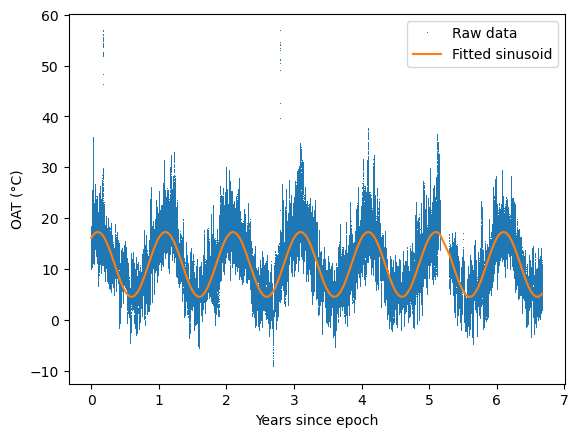

In [15]:
#plot the raw data
plt.plot(times, dTE, ',', label='Raw data')

#This applies curve_fit using our defined function and the data.
#curve_fit takes 3 main arguments: the function to fit, xdata and ydata.
#in this case we also provide "p0", which are our own initial guesses for
#each of the fitted parameters - try running it without these guesses;
#it should fail to find an appropriate solution. This is more likely the more
#complex the function and the larger number of free parameters
popt, pcov = curve_fit(sinusoid,times, dTE, p0=[10,1,0.3,10])
#curve_fit gives back optimised parameters (popt, here) and the covariance
#matrix (pcov, here) for those parameters

#displays the fitted parameters
print('Fitted parameters',popt)

#this plots the fitted function; note that "*popt" rather that just "popt" is
#used, this is intentional and separates the items in the list/array before
#giving them to the function
plt.plot(times,sinusoid(times,*popt),label='Fitted sinusoid')

plt.xlabel('Years since epoch')
plt.ylabel('OAT (°C)')

plt.legend()

plt.show()

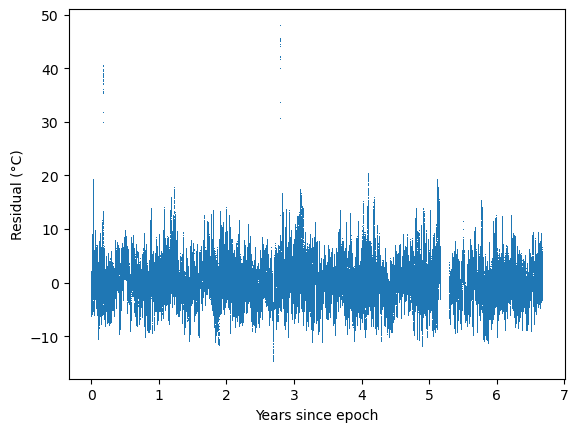

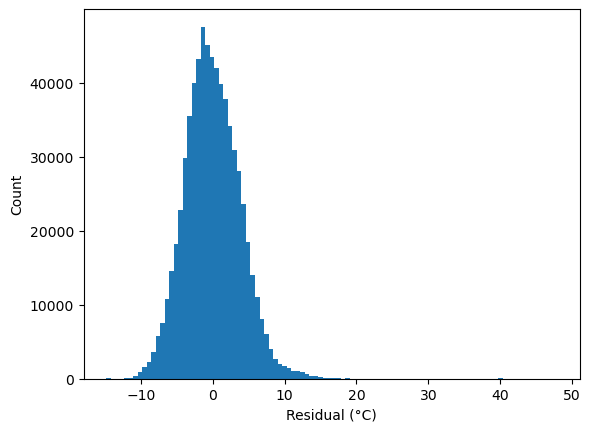

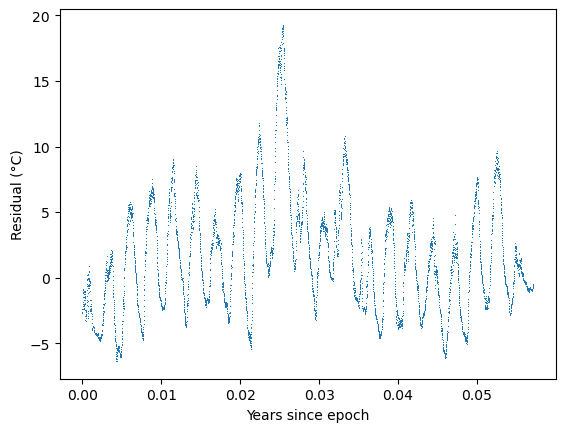

In [16]:
#This shows a couple of ways to examine the nature of the fit

#calculate the residual of data - fit
residual = dTE - sinusoid(times,*popt)

#plot the residual as a function of time - this may let us see larger variations
#from the expected behaviour which are time dependant
plt.plot(times,residual,',')
plt.ylabel('Residual (°C)')
plt.xlabel('Years since epoch')
plt.show()

#plot the histogram of the residuals - this shows the distribution of the data
#around the fit
plt.hist(residual,bins=100)
plt.xlabel('Residual (°C)')
plt.ylabel('Count')
plt.show()


#This replots the residuals against time over a shorter range. Here we can
#clearly see there is a second oscillatory pattern overlaid on the annual
#variation - the daily temperature cycle showing itself in the residuals
plt.plot(times[:6000],residual[:6000],',')
plt.ylabel('Residual (°C)')
plt.xlabel('Years since epoch')
plt.show()